# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.  
Наша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.  
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 

### Откроем файл с данными и изучим общую информацию. 

Импортируем библиотеки

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

Откроем файл, посмотрим первые 5 строчек данных, общую информаию о датафрейме и построим гистограммы для каждого столбца.

In [1]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

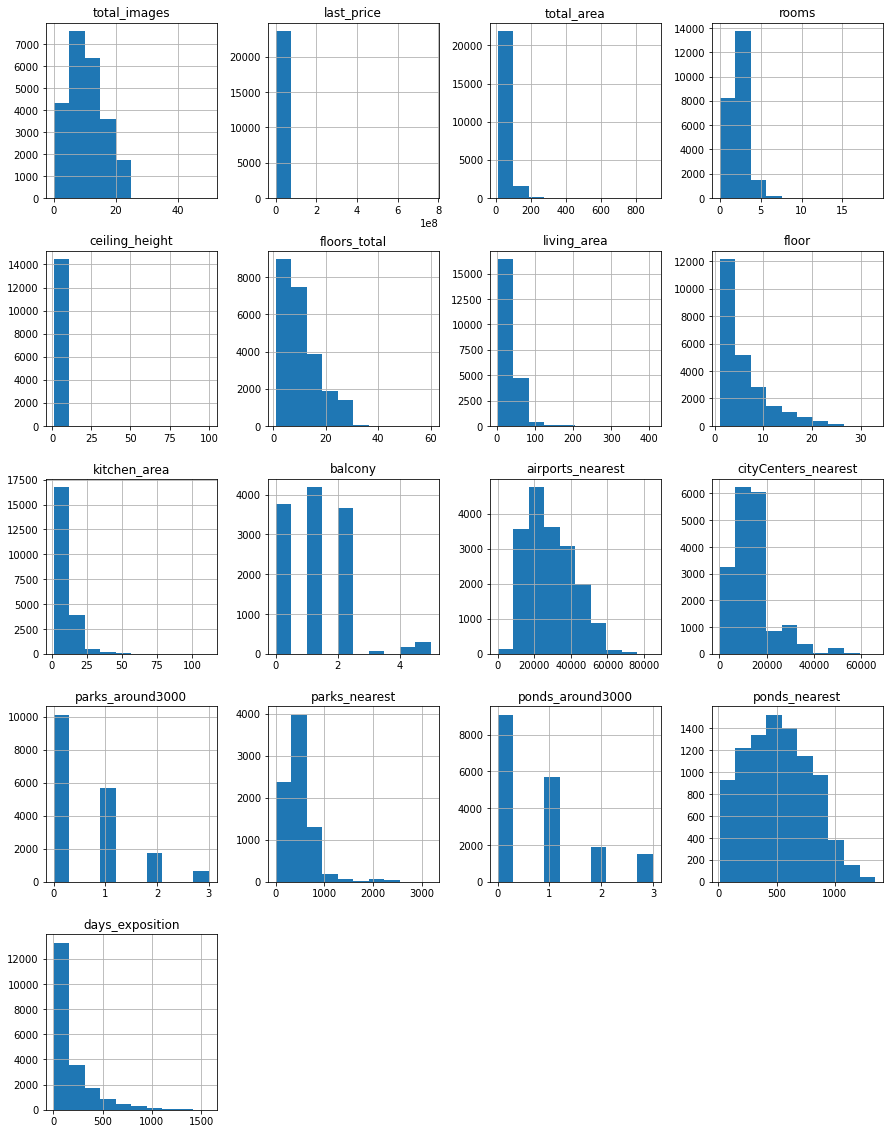

In [3]:
data.hist(figsize=(15, 20));

Проверим на дубликаты.

In [4]:
data.duplicated().sum()

0

В инфо видим что в данных много пропусков.  
На гистограммах видим что в столбцах last_price, total_area и ceiling height данные расположены только скраю гистограмы. Это говорит о том, что там есть значения, сильно отличающиеся от общей массы.  
Явных дубликатов в таблице нет.

### Предобработка данных

#### Заполнение пропусков.
Посмотрим в каких столбцах есть пропуски: выведем сумму пропусков в каждом столбце.

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Есть пропущенные значения в столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.
Заполним пропуски в столбце is_apartment. Посмотрим какие значения встречаются в этом столбце.

In [6]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Если данные не указаны, то скорее всего это не апартаменты. Заменим пропуски на False.

In [7]:
data['is_apartment'].fillna(False, inplace=True)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заменим пропуски в столбце balcony. Посмотрим какие значения встречаются в этом столбце.

In [8]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Если не указано наличие балконов, то скорее всего их нет. Заменим пропуски на 0.

In [9]:
data['balcony'].fillna(0, inplace=True)
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

В столбце locality_name с названиями населённых пунктов пропуски образовались либо из-за того что изначально населённый пункт не был указан в объявлении, либо по каким то причинам он не выгруился при создании базы данных. Заполним пропуски словом "unknown".

In [10]:
data['locality_name'] = data['locality_name'].fillna('unknown')
data['locality_name'].isna().sum()

0

Изучим пропуски в столбцах parks_around3000 и ponds_around3000 с количеством ближайших парков и водоёмов. Проверим для всех ли пропусков так же отсутствует и расстояние до ближайшего парка или водоёма.

In [11]:
print(f"Строк, где не указано кол-во парков, но есть расстояние до парка: {data.query('parks_around3000.isna() and not(parks_nearest.isna())')['total_area'].count()}")
print(f"Строк, где не указано кол-во водоёмов, но есть расстояние до водоёма: {data.query('ponds_around3000.isna() and not(ponds_nearest.isna())')['total_area'].count()}")

Строк, где не указано кол-во парков, но есть расстояние до парка: 0
Строк, где не указано кол-во водоёмов, но есть расстояние до водоёма: 0


Для всех пропусков в столбцах parks_around3000 и ponds_around3000 так же пропущено и расстояние до парка или водоёма. Скорее всего для этих квартир просто нет парка или водоёма в пределах 3000 метров. Заполним пропуски нулями.

In [12]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
print(f"Пропусков в столбце parks_around3000 осталось: {data['parks_around3000'].isna().sum()}")
print(f"Пропусков в столбце ponds_around3000 осталось: {data['ponds_around3000'].isna().sum()}")


Пропусков в столбце parks_around3000 осталось: 0
Пропусков в столбце ponds_around3000 осталось: 0


Посмотрим есть ли строки, в которых есть парки или водоёмы, но не указано до них растояние. Это поможет понять природу пропусков в столбцах parks_nearest и ponds_nearest.

In [13]:
data.query('parks_around3000>0 and parks_nearest.isna()').count()
data.query('ponds_around3000>0 and ponds_nearest.isna()').count()

print(f"Строк, где есть парки, но не указано до них расстояние: {data.query('parks_around3000>0 and parks_nearest.isna()')['total_area'].count()}")
print(f"Строк, где есть водоёмы, но не указано до них расстояние: {data.query('ponds_around3000>0 and ponds_nearest.isna()')['total_area'].count()}")

Строк, где есть парки, но не указано до них расстояние: 0
Строк, где есть водоёмы, но не указано до них расстояние: 0


В столбцах parks_nearest и ponds_nearest пропущены данные в связи с чем, что для этих квартир просто нет поблизости парка или водоёма.  
Изучим пропуски в столбцах cityCenters_nearest и airports_nearest.

In [14]:
#Выведем в каких населённых пунктах указаны расстояния до центра
display(data.query('not(cityCenters_nearest.isna())')['locality_name'].unique())
display(data.query('not(airports_nearest.isna())')['locality_name'].unique())

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Парголово',
       'Ломоносов', 'Петергоф', 'Пушкин', 'Колпино', 'Кронштадт',
       'посёлок Металлострой', 'Павловск', 'Сестрорецк', 'Красное Село',
       'посёлок Понтонный', 'Зеленогорск', 'посёлок Молодёжное',
       'посёлок Стрельна', 'посёлок Александровская', 'unknown',
       'посёлок Песочный', 'посёлок Петро-Славянка', 'посёлок Репино',
       'посёлок Сапёрный', 'посёлок Щеглово', 'поселок Лисий Нос',
       'посёлок Левашово', 'посёлок Белоостров', 'поселок Мурино',
       'посёлок Лисий Нос', 'посёлок Усть-Ижора'], dtype=object)

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Парголово',
       'Ломоносов', 'Петергоф', 'Пушкин', 'Колпино', 'Кронштадт',
       'посёлок Металлострой', 'Павловск', 'Сестрорецк', 'Красное Село',
       'посёлок Понтонный', 'Зеленогорск', 'посёлок Молодёжное',
       'посёлок Стрельна', 'посёлок Александровская', 'unknown',
       'посёлок Песочный', 'посёлок Петро-Славянка', 'посёлок Репино',
       'посёлок Сапёрный', 'посёлок Щеглово', 'поселок Лисий Нос',
       'посёлок Левашово', 'посёлок Белоостров', 'поселок Мурино',
       'посёлок Лисий Нос', 'посёлок Усть-Ижора'], dtype=object)

Видим что в столбцах cityCenters_nearest и airports_nearest данные указаны только для Санкт-Петербурга и его ближайшего окружения, то есть в этих столбцах расстояния до центра Санкт-Петербурга и до аэропорта Пулково.  
Посмотрим для всех ли квартир в пригородах Санкт-Петербурга указаны данные в этих столбцах. Выведем строки, где не указаны.

In [15]:
list_of_localities = data.query('not(cityCenters_nearest.isna())')['locality_name'].unique()
data.query('locality_name.isin(@list_of_localities) and cityCenters_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
66,6,3450000.0,34.0,2015-12-16T00:00:00,1,2.6,17.0,17.4,8,False,...,11.5,2.0,поселок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,186.0
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,NaN,10.0,NaN,6,False,...,NaN,0.0,Санкт-Петербург,NaN,NaN,0.0,NaN,0.0,NaN,NaN
593,20,4200000.0,38.3,2019-04-16T00:00:00,1,2.6,16.0,19.8,10,False,...,10.1,2.0,Санкт-Петербург,NaN,NaN,0.0,NaN,0.0,NaN,NaN
604,11,9899000.0,101.0,2018-12-12T00:00:00,3,3.0,5.0,62.0,3,False,...,15.0,0.0,Санкт-Петербург,NaN,NaN,0.0,NaN,0.0,NaN,NaN
608,2,1850000.0,25.0,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,False,...,NaN,0.0,посёлок Шушары,NaN,NaN,0.0,NaN,0.0,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22628,8,8600000.0,74.9,2019-03-14T00:00:00,3,3.0,5.0,53.2,4,False,...,8.0,1.0,Санкт-Петербург,NaN,NaN,0.0,NaN,0.0,NaN,NaN
22652,5,2650000.0,26.0,2015-06-24T00:00:00,1,NaN,14.0,15.0,11,False,...,NaN,0.0,поселок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,373.0
22717,9,3000000.0,35.0,2018-01-02T00:00:00,1,2.6,16.0,16.0,7,False,...,10.0,1.0,unknown,NaN,NaN,0.0,NaN,0.0,NaN,75.0
23022,7,3280000.0,58.0,2017-05-17T00:00:00,2,NaN,5.0,31.4,2,False,...,NaN,0.0,посёлок Щеглово,NaN,NaN,0.0,NaN,0.0,NaN,53.0


Видим что данные в столбцах cityCenters_nearest и airports_nearest заполнены только для ближайших пригородов Санкт-Петербурга, но не для всех квартир. Скорее всего пропуски связаны с тем способом, которым эти данные заполняли.  
Заполним пропуски для всех мелких населённых пунктов средним значением для этого населённого пункта.

In [16]:
print(f"Было пропусков в cityCenters_nearest до заполнения: {data['cityCenters_nearest'].isna().sum()}")
#Заполняем пропуски в cityCenters_nearest
data['cityCenters_nearest'] = data.query(
    'not(locality_name == "Санкт-Петербург") or not(locality_name == "unknown")')['cityCenters_nearest'].fillna(
    data.query('locality_name.isin(@list_of_localities)').groupby('locality_name')['cityCenters_nearest'].transform('mean')
)
print(f"Стало пропусков в cityCenters_nearest после заполнения: {data['cityCenters_nearest'].isna().sum()}")

print(f"Было пропусков в airports_nearest до заполнения: {data['airports_nearest'].isna().sum()}")
list_of_localities = data.query('not(airports_nearest.isna())')['locality_name'].unique()
#Заполняем пропуски в airports_nearest
data['airports_nearest'] = data.query(
    'not(locality_name == "Санкт-Петербург") or not(locality_name == "unknown")')['airports_nearest'].fillna(
    data.query('locality_name.isin(@list_of_localities)').groupby('locality_name')['airports_nearest'].transform('mean')
)
print(f"Стало пропусков в airports_nearest после заполнения: {data['airports_nearest'].isna().sum()}")

Было пропусков в cityCenters_nearest до заполнения: 5519
Стало пропусков в cityCenters_nearest после заполнения: 5386
Было пропусков в airports_nearest до заполнения: 5542
Стало пропусков в airports_nearest после заполнения: 5386


Рассмотрим пропуски в столбце days_exposition.  
Проверим, может пропуски связаны с тем, что объявления ещё не сняли с публицации.
Выведем общее число пропусков и самые ранние даты публикации объявлений с пропусками в days_exposition.

In [17]:
print(f"Всего пропусков в days_exposition: {data['days_exposition'].isna().sum()}")
data.query('days_exposition.isna()')['first_day_exposition'].sort_values().head(15)

Всего пропусков в days_exposition: 3181


3873     2014-11-27T00:00:00
15857    2014-11-27T00:00:00
3291     2014-11-27T00:00:00
6922     2014-12-08T00:00:00
15614    2014-12-09T00:00:00
260      2014-12-09T00:00:00
11811    2014-12-09T00:00:00
5956     2014-12-09T00:00:00
16327    2014-12-09T00:00:00
3056     2014-12-09T00:00:00
11055    2014-12-09T00:00:00
3974     2014-12-10T00:00:00
18386    2014-12-10T00:00:00
5629     2014-12-10T00:00:00
2814     2014-12-11T00:00:00
Name: first_day_exposition, dtype: object

Видим что есть строки с пропусками в days_exposition, для объявлений, опубликованных ещё в 2014 году. Значит скорее всего пропуски не связаны с тем, что объявления ещё не сняты с продажы, или связаны не все. 
Мы не можем восстановить эти данные, поэтому оставим пропуски на своих местах.

**Вывод по заполнению пропусков:**  
- Заполнили пропуски в столбцах is_apartment значениями False, в столбце balcony нулями
- В столбце locality_name с названиями населённых пунктов пропуски образовались либо из-за того что изначально населённый пункт не был указан в объявлении, либо по каким то причинам он не выгруился при создании базы данных. Заполнили пропуски строкой "unknown"
- В столбцах parks_around3000 и ponds_around3000 пропущены значения для квартир, рядом с которыми нет парков или водоёмов. Заполнили пропуски нулями.
- В столбцах parks_nearest и ponds_nearest пропущены данные по той же причине: рядом нет парка или водоёма. Поэтому оставили пропуски без изменений.
- В столбцах ceiling_height, floors_total, living_area, kitchen_area пропуски скорее всего из-за того что в объявлении не были указаны высота потолков, количество этажей, жилая площадь или площадь кухни. Заменять пропуски на среднее значение или медиану считаю неправильным, потому что в этом случае мы можем исказить общую статистику. Оставим пропуски как есть.
- В столбцах cityCenters_nearest и airports_nearest пропуски скорее всего связаны с тем способом, которым эти данные заполняли. Для мелких населённых пунктов мы заполнили данные средним значением для этого населённого пункта, а для Санкт-Петербурга и для квартир, где населённый пункт не указан, оставили пропуски как есть что бы не искажать данные.
- В столбце days_exposition пропуски скорее всего связаны с тем, что данные просто не были выгружены в таблицу. Оставили пропуски без изменений.

#### Замена типов данных

В стобце first_day_exposition заменим тип данных на datetime для правильного отображения и возможности работы с данными как со временем.

In [18]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

В столбцах balcony, parks_around3000 и ponds_around3000 находятся только целые числа, поэтому заменим тип данных на "int32"

In [19]:
data['balcony'] = data['balcony'].astype('int32')
data['parks_around3000'] = data['parks_around3000'].astype('int32')
data['ponds_around3000'] = data['ponds_around3000'].astype('int32')

В столбце days_exposition тоже только целые числа, но там так же присутствуют пропуски, которые относятся к типу float. Мы не можем заменить тип данных на целочисленный, не заполнив пропуски. А так как пропуски мы заполнить не можем - оставим тип данных float.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично!

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

#### Замена дубликатов
Изучим столбец locality_name на предмет неявных дубликатов.

In [21]:
# Выводим исходные значения столбца locality_name
data.sort_values(by='locality_name')['locality_name'].unique()

array(['unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'город

Видим что в таблице есть населённые пункты "поселок Рябово" и "поселок городского типа Рябово". Так же есть «поселок Тельмана» и «посёлок Тельмана». Это одни и те же населённые пункты, но называются по-разному. Что бы избавиться от этой проблемы удалим из названий все слова, которые начинаются не с заглавной буквы. Оставим только само название населённого пункта, которое начинается с заглавной буквы.

In [22]:
data['locality_name'] = data['locality_name'].str.replace(r'\b[^А-Я]+[а-я]+\s', '', regex=True)
data.sort_values(by='locality_name')['locality_name'].unique()

array(['unknown', 'Агалатово', 'Александровская', 'Алексеевка', 'Аннино',
       'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород

#### Устранение редких и выбивающихся значений
Посмотрим на недвижимость с высотой потолков больше 5-ти метров

In [23]:
data.query('ceiling_height>5').sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
464,15,66571000.0,280.3,2015-06-11,6,5.2,8.0,159.5,7,False,...,21.1,0,Санкт-Петербург,26316.0,6655.0,3,187.0,1,616.0,578.0
12628,14,3900000.0,50.0,2018-03-29,1,5.3,5.0,NaN,5,False,...,NaN,0,Санкт-Петербург,19644.0,3918.0,1,505.0,1,92.0,8.0
1026,20,155000000.0,310.0,2018-10-12,5,5.3,3.0,190.0,3,False,...,63.0,2,Санкт-Петербург,24899.0,4785.0,0,NaN,1,603.0,NaN
7578,17,38000000.0,143.0,2017-11-02,3,5.5,5.0,83.0,5,False,...,29.0,1,Санкт-Петербург,26333.0,6448.0,3,479.0,0,NaN,NaN
1388,20,59800000.0,399.0,2015-01-21,5,5.6,6.0,NaN,6,False,...,NaN,0,Санкт-Петербург,26204.0,6934.0,2,149.0,2,577.0,719.0
21227,0,8200000.0,71.0,2017-07-21,0,5.8,5.0,68.0,5,False,...,NaN,0,Санкт-Петербург,20170.0,1261.0,2,295.0,3,366.0,30.0
20264,17,119000000.0,187.6,2017-07-10,4,6.0,7.0,147.0,7,False,...,15.6,0,Санкт-Петербург,26902.0,5605.0,3,484.0,1,305.0,259.0
17442,0,5350000.0,54.0,2015-06-16,2,8.0,5.0,29.0,2,False,...,NaN,1,Красное Село,24638.0,28062.0,0,NaN,0,NaN,469.0
15743,14,5600000.0,67.0,2016-11-11,3,8.0,16.0,41.0,1,False,...,8.0,0,Санкт-Петербург,32691.0,11035.0,1,723.0,0,NaN,474.0
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,...,7.3,0,Нурма,NaN,NaN,0,NaN,0,NaN,125.0


В данных есть недвижимость с высотой потолков 20 и больше метров. Скорее всего при вводе этих данных забыли поставить запятую и 24 метра, на самом деле 2,4 метра. Разделим на 10 те данные о высоте потолка в столбце ceiling_height, которые больше 20 метров.

In [24]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height']<20, data['ceiling_height']/10)
data.query('ceiling_height>5').sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
464,15,66571000.0,280.3,2015-06-11,6,5.2,8.0,159.5,7,False,...,21.1,0,Санкт-Петербург,26316.0,6655.0,3,187.0,1,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12,5,5.3,3.0,190.0,3,False,...,63.0,2,Санкт-Петербург,24899.0,4785.0,0,NaN,1,603.0,NaN
12628,14,3900000.0,50.0,2018-03-29,1,5.3,5.0,NaN,5,False,...,NaN,0,Санкт-Петербург,19644.0,3918.0,1,505.0,1,92.0,8.0
7578,17,38000000.0,143.0,2017-11-02,3,5.5,5.0,83.0,5,False,...,29.0,1,Санкт-Петербург,26333.0,6448.0,3,479.0,0,NaN,NaN
1388,20,59800000.0,399.0,2015-01-21,5,5.6,6.0,NaN,6,False,...,NaN,0,Санкт-Петербург,26204.0,6934.0,2,149.0,2,577.0,719.0
21227,0,8200000.0,71.0,2017-07-21,0,5.8,5.0,68.0,5,False,...,NaN,0,Санкт-Петербург,20170.0,1261.0,2,295.0,3,366.0,30.0
20264,17,119000000.0,187.6,2017-07-10,4,6.0,7.0,147.0,7,False,...,15.6,0,Санкт-Петербург,26902.0,5605.0,3,484.0,1,305.0,259.0
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,...,7.3,0,Нурма,NaN,NaN,0,NaN,0,NaN,125.0
15743,14,5600000.0,67.0,2016-11-11,3,8.0,16.0,41.0,1,False,...,8.0,0,Санкт-Петербург,32691.0,11035.0,1,723.0,0,NaN,474.0
17442,0,5350000.0,54.0,2015-06-16,2,8.0,5.0,29.0,2,False,...,NaN,1,Красное Село,24638.0,28062.0,0,NaN,0,NaN,469.0


Видим, что остались только данные с высотой потолков меньше 20-ти метров.
Посмотрим на самые маленькие значения высот потолков.

In [25]:
data['ceiling_height'].sort_values().head(10)

22590    1.00
5712     1.20
16934    1.75
552      2.00
19098    2.00
4212     2.00
16884    2.00
5850     2.00
11352    2.00
17496    2.00
Name: ceiling_height, dtype: float64

Видим, что есть строки с аномально низкими потолками. Удалим строки с потолком в 1 метр и в 1,2 метра.

In [26]:
data = data.query('index not in [5712, 22590]')

Посмотрим на гистограмму общей площади недвижимости 

<AxesSubplot:>

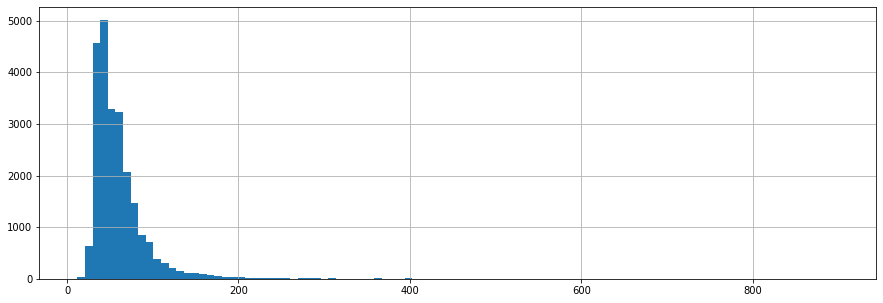

In [27]:
data['total_area'].hist(bins=100, figsize=(15,5))

Видим что недвижимость с площадью больше 250-ти метров очень редка, посмотрим гистограмму недвижимости с площадью больше 150 метров. Посмотрим какой процент от всех данных составляют квартиры с площадью больше чем 250 метров.

Всего квартир: 23697
Количество квартир с площадью больше чем 250: 116
Они составляют: 0.49 %


<AxesSubplot:>

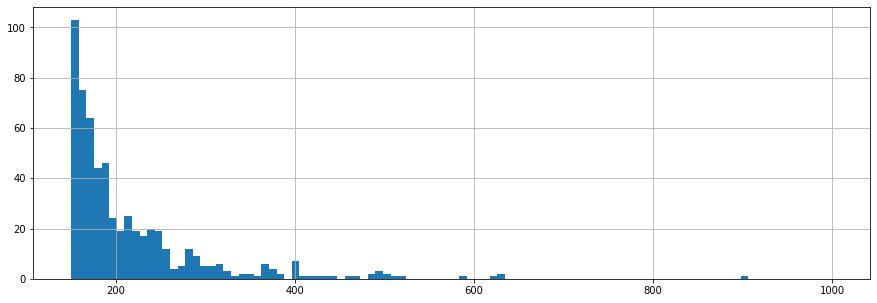

In [28]:
print(f'Всего квартир: {data["total_area"].count()}')
print(f'Количество квартир с площадью больше чем 250: {data.query("total_area >= 250")["total_area"].count()}')
print(f'Они составляют: {data.query("total_area >= 250")["total_area"].count() / data["total_area"].count() * 100:.2f} %')

data['total_area'].hist(bins=100, figsize=(15,5), range=(150,1000))

Удалим данные о недвижимости с площадью больше 250 метров, они составляют всего пол процента от всех данных.

<AxesSubplot:>

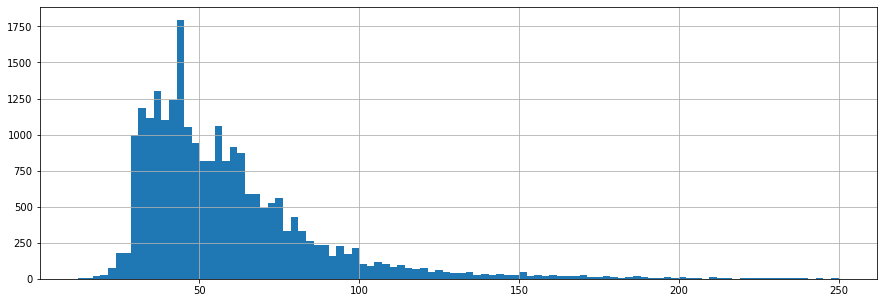

In [29]:
data = data.query('total_area < 250')
data['total_area'].hist(bins=100, figsize=(15,5))

Посмотрим на гистограмму цен на объекты.

<AxesSubplot:>

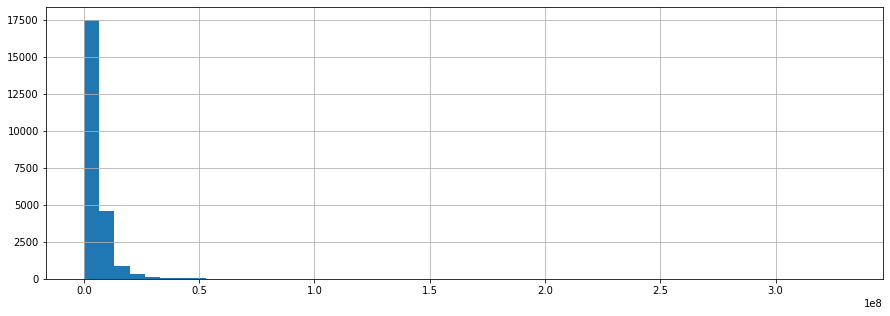

In [30]:
data['last_price'].hist(bins=50, figsize=(15,5))

Видим что объектов с ценой больше чем 50 миллионов почти нет. Посмотрим более крупно на объекты с ценой больше 30-ти миллионов. Посчитаем какой процент от всех данных составляют квартиры с ценой больше 50-ти миллионов.

Всего квартир: 23581
Количество квартир с площадью больше чем 250: 81
Они составляют: 0.34 %


<AxesSubplot:>

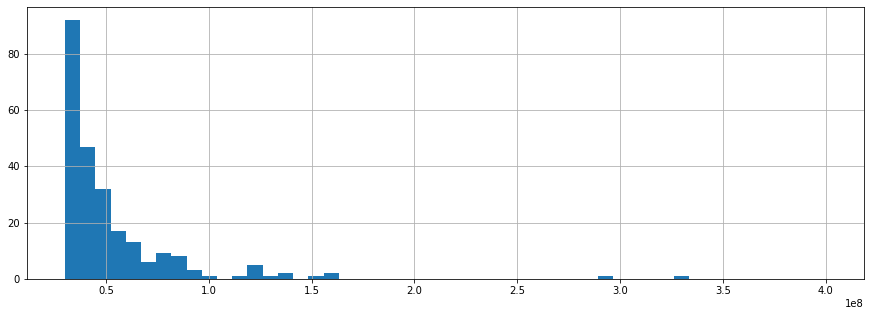

In [31]:
print(f'Всего квартир: {data["last_price"].count()}')
print(f'Количество квартир с площадью больше чем 250: {data.query("last_price >= 50000000")["last_price"].count()}')
print(f'Они составляют: {data.query("last_price >= 50000000")["last_price"].count() / data["last_price"].count() * 100:.2f} %')

data['last_price'].hist(bins=50, figsize=(15,5), range = (30000000,400000000))

Удалим данные об объектах, чья цена больше чем 50 миллионов. Они составляют примерно треть процента от всех данных.

<AxesSubplot:>

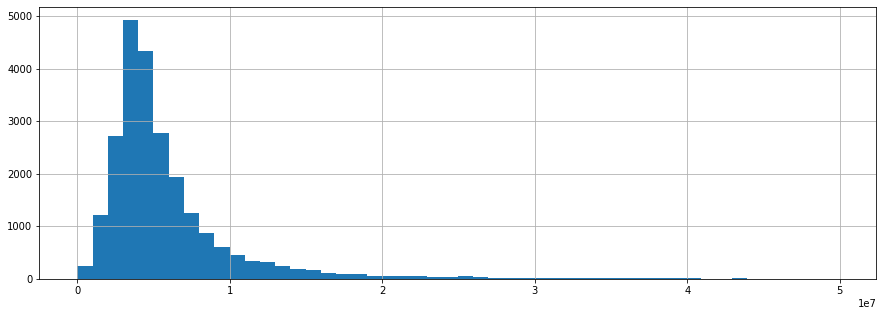

In [32]:
data = data.query('last_price < 50000000')
data['last_price'].hist(bins=50, figsize=(15,5))

Посмотрим на самые маленькие значения цен.

In [33]:
data['last_price'].sort_values().head()

8793      12190.0
17456    430000.0
14911    430000.0
16274    440000.0
17676    450000.0
Name: last_price, dtype: float64

In [34]:
data.query('index == 8793')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0


В данных есть одна запись о квартире в Санкт-Петербурге с ценой в 12190 рублей, очевидно что это ошибка, удалим эту запись.

In [35]:
data = data.query('last_price > 400000')

Итого мы удалили 200 строк выбивающихся и аномальных значений. Это 0.84% от изначальных дынных.

### Посчитаем и добавим в таблицу новые столбцы
#### Добавим столбец с ценой квадратного метра.

In [36]:
data['price_per_meter'] = data['last_price']/data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,0,Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.789474


#### Добавим столбцы с днём недели, месяцем и годом публицакии объявления

In [37]:
data['weekday'] = data['first_day_exposition'].dt.day_of_week
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370,3
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,1
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.789474,0


In [38]:
data['month'] = data['first_day_exposition'].dt.month
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,NaN,NaN,0,NaN,0,NaN,55.0,95065.789474,0,9


In [39]:
data['year'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,NaN,0,NaN,0,NaN,55.0,95065.789474,0,9,2018


#### Добавим тип этажа квартиры (значения — «‎первый», «последний», «другой»)

In [40]:
def floor_type(row):
    if row['floor']==1:
        return 'первый'
    elif row['floor']==row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)
data.head()    

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,0,NaN,0,NaN,55.0,95065.789474,0,9,2018,другой


#### Добавим столбец с растоянием до центра в километрах, с округлением до целого

In [41]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,NaN,0,NaN,55.0,95065.789474,0,9,2018,другой,NaN


### Проведём исследовательский анализ данных
#### Изучим отдельные параметры объектов
Посмотрим на гистограмму площадей недвижимости. Выведем среднее и медианное значения.

Среднее значение: 58.54624239329334
Медианное значение: 52.0


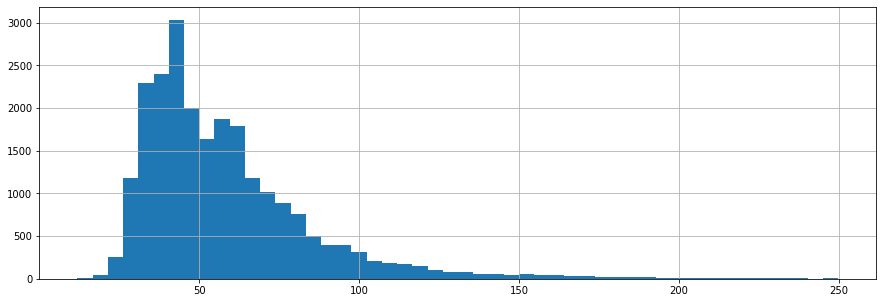

In [42]:
data['total_area'].hist(bins=50, figsize=(15,5))
print(f"Среднее значение: {data['total_area'].mean()}")
print(f"Медианное значение: {data['total_area'].median()}")

Среднее значение: 59.99, медианное значение: 53.0.  
Видим что основной объём сосредоточен в диапазоне от 30-ти до 60-ти квадратных метров, а дальше чем больше площадь, тем меньше недвижимости. Распределение похоже на распределение Пирсона.
Посмотрим на гистограмму жилой площади.

Среднее значение: 33.52103193709819
Медианное значение: 30.0


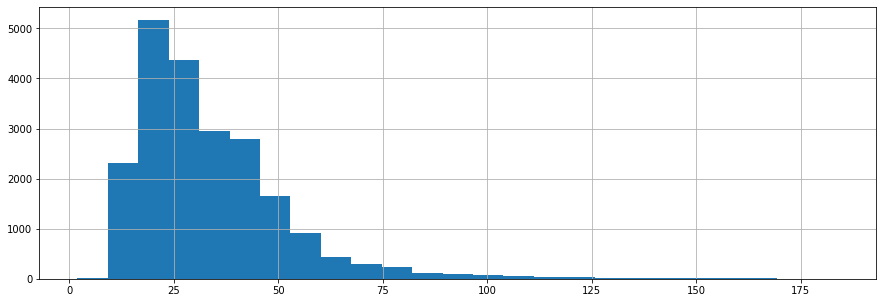

In [43]:
data['living_area'].hist(bins=25, figsize=(15,5))
print(f"Среднее значение: {data['living_area'].mean()}")
print(f"Медианное значение: {data['living_area'].median()}")

Среднее значение: 34.7, медианное значение: 30.6З.  
Закономерно, что основной объём жилой площади смещён в меньшую сторону, относительно общей площади. Распределение также выглядит как распределение Пирсона.
Посмотрим на гистограмму площадей кухонь.

Среднее значение: 10.391502800395351
Медианное значение: 9.0


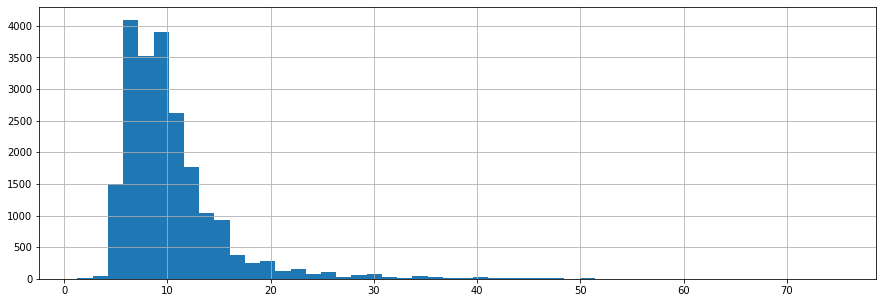

In [44]:
data['kitchen_area'].hist(bins=50, figsize=(15,5))
print(f"Среднее значение: {data['kitchen_area'].mean()}")
print(f"Медианное значение: {data['kitchen_area'].median()}")

Среднее значение: 10.4, медианное значение: 9.0.  
В основном площадь кухни от 5 до 15 метров. Распределение так же похоже на распределение Пирсона.  
Посмотрим на цены объектов.

Среднее значение: 5926546.1134090815
Медианное значение: 4600000.0


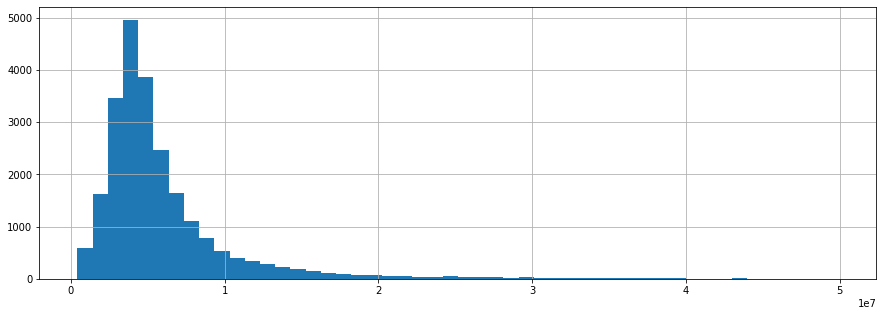

In [45]:
data['last_price'].hist(bins=50, figsize=(15,5))
print(f"Среднее значение: {data['last_price'].mean()}")
print(f"Медианное значение: {data['last_price'].median()}")

Среднее значение: 6207545.96, медианное значение: 4800000.0.  
Самый высокий пик распределения цен находится в районе 4-х миллионов. Распределение похоже на распределение Пирсона.
Посмотрим на гистограмму количества комнат.

<AxesSubplot:>

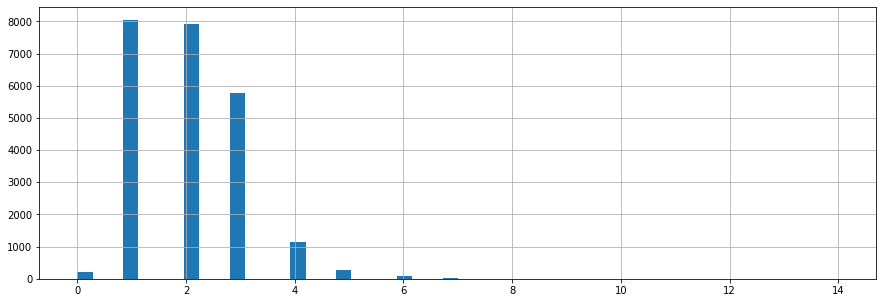

In [46]:
data['rooms'].hist(bins=50, figsize=(15,5))

В основном продавалась недвиждимость, имеющая 1, 2 или 3 комнаты. Посмотрим гистограмму высоты потолков.

Среднее значение: 2.7239273789649414
Медианное значение: 2.65


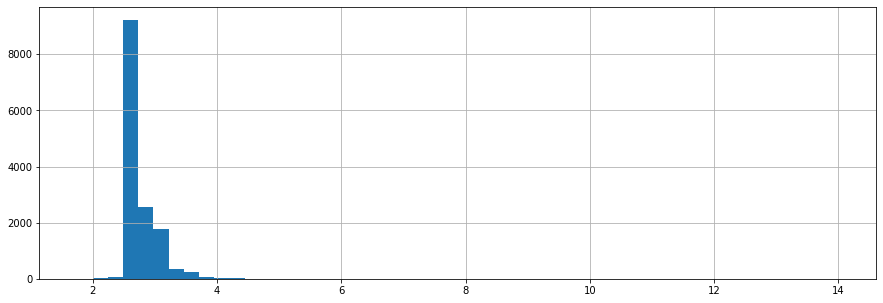

In [47]:
data['ceiling_height'].hist(bins=50, figsize=(15,5))
print(f"Среднее значение: {data['ceiling_height'].mean()}")
print(f"Медианное значение: {data['ceiling_height'].median()}")

Среднее значение: 2.72, медианное значение: 2.65.  
В основном высота потолков от 2-х до 3-х метров. Распределение напоминает распределение Пирсона.  
Посмотрим на этаж квартиры.

Среднее значение: 5.897229669347632
Медианное значение: 4.0


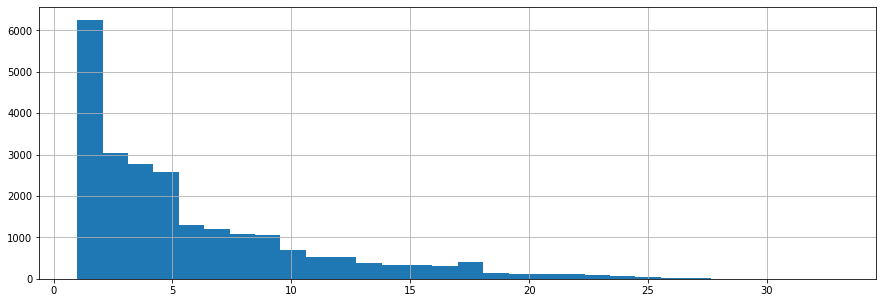

In [48]:
data['floor'].hist(bins=30, figsize=(15,5))
print(f"Среднее значение: {data['floor'].mean()}")
print(f"Медианное значение: {data['floor'].median()}")

Среднее значение: 5.62, медианное значение: 4.0.  
Чем ниже этаж, тем больше на нём продавалось квартир. Скорее всего большинство квартир находятся в пятиэтажках. Распределение похоже на распределение Пирсона.
Посмотрим тип этажа квартиры («первый», «последний», «другой»)

<AxesSubplot:>

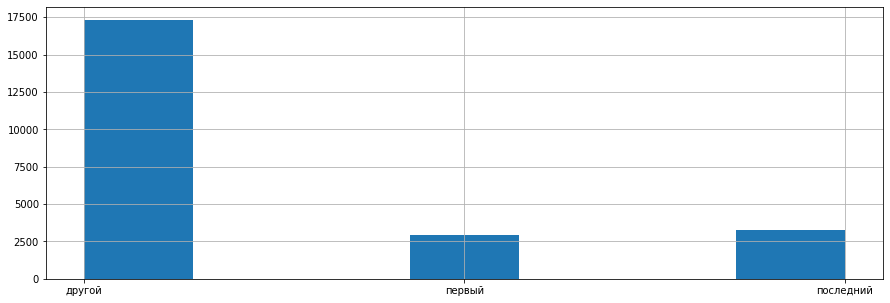

In [49]:
data['floor_type'].hist(bins=7, figsize=(15,5))

Закономерно что больше всего квартир в категории "другой", а на первом и последних этажах примерно поровну.  
Посмотрим общее количество этажей в доме

Среднее значение: 10.703468010591953
Медианное значение: 9.0


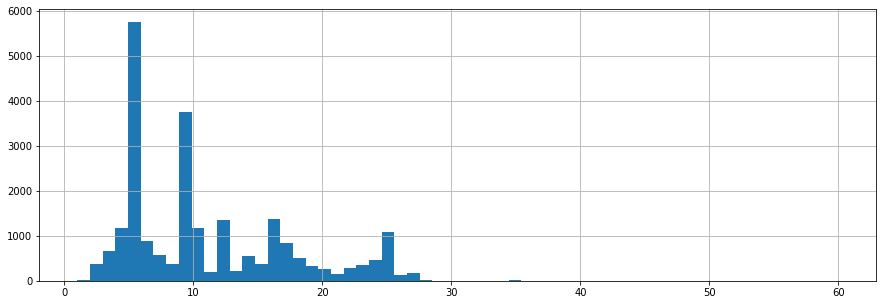

In [50]:
data['floors_total'].hist(bins=60, figsize=(15,5))
print(f"Среднее значение: {data['floors_total'].mean()}")
print(f"Медианное значение: {data['floors_total'].median()}")

Среднее значение: 10.2, медианное значение: 9.0.  
На гистограмме видно что большинство квартир находятся в пятиэтажках и девятиэтажках. Распределение не похоже ни на Нормальное ни на распределение Пирсона.
Посмотрим расстояние до центра города в метрах.

Среднее значение: 14317.157286727943
Медианное значение: 13149.0


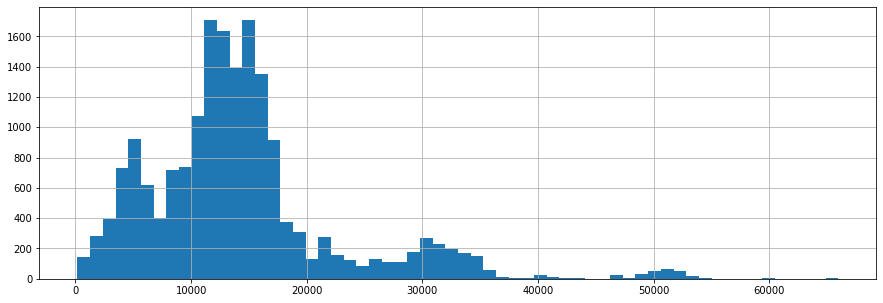

In [51]:
data['cityCenters_nearest'].hist(bins=60, figsize=(15,5))
print(f"Среднее значение: {data['cityCenters_nearest'].mean()}")
print(f"Медианное значение: {data['cityCenters_nearest'].median()}")

Среднее значение: 14179.85, медианное значение: 13009.0.  
В основном квартиры от 10-ти до 15-ти километров от центра. Распределение отдалённо похоже на распределение Пирсона. На гистограмме мы видим, что квартиры в таблице сгруппированы в определённых жилых районах с разной удалённостью от центра. 
Посмотрим расстояние до ближайшего аэропорта.

Среднее значение: 28887.345259554717
Медианное значение: 26890.0


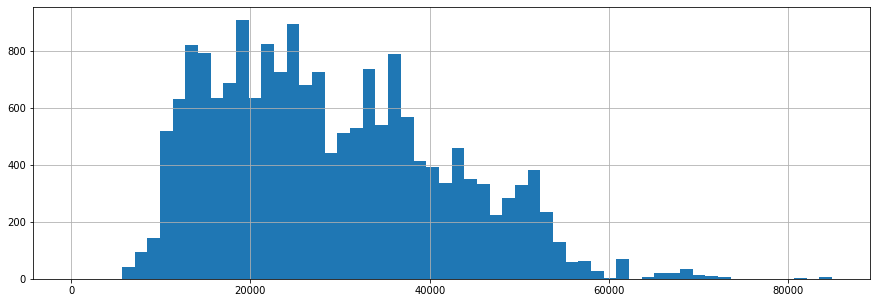

In [52]:
data['airports_nearest'].hist(bins=60, figsize=(15,5))
print(f"Среднее значение: {data['airports_nearest'].mean()}")
print(f"Медианное значение: {data['airports_nearest'].median()}")

Среднее значение: 28882.26, медианное значение: 26876.0.  
Основной объём квартир находится на расстоянии от 10-ти до 35-ти километров от аэропорта. Распределение похоже на распределение Пирсона.  
Посмотрим расстояние до ближайшего парка.

Среднее значение: 492.3706549118388
Медианное значение: 456.0


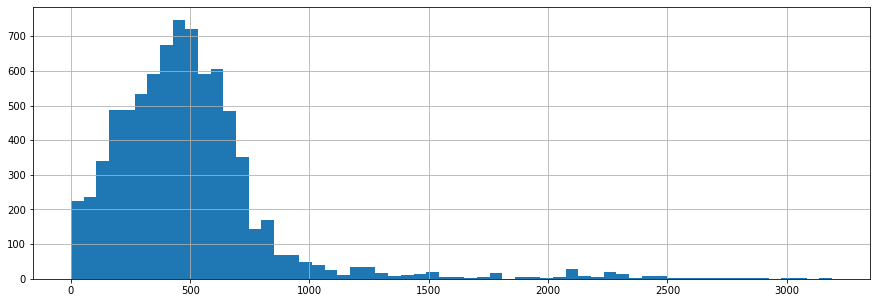

In [53]:
data['parks_nearest'].hist(bins=60, figsize=(15,5))
print(f"Среднее значение: {data['parks_nearest'].mean()}")
print(f"Медианное значение: {data['parks_nearest'].median()}")

Среднее значение: 478.85, Медианное значение: 451.0.  
От большинства квартир до парка в районе пятиста метров. Распределение похоже на распределение Пирсона.  
Посмотрим день и месяц публикации объявления.

Среднее значение: 2.56806672624367
Медианное значение: 3.0


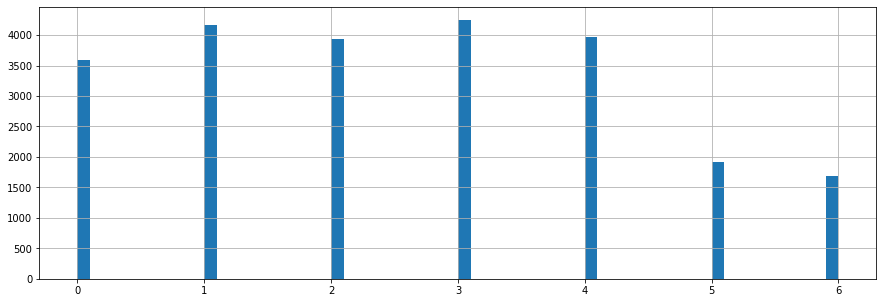

Среднее значение: 6.399676581982212
Медианное значение: 6.0


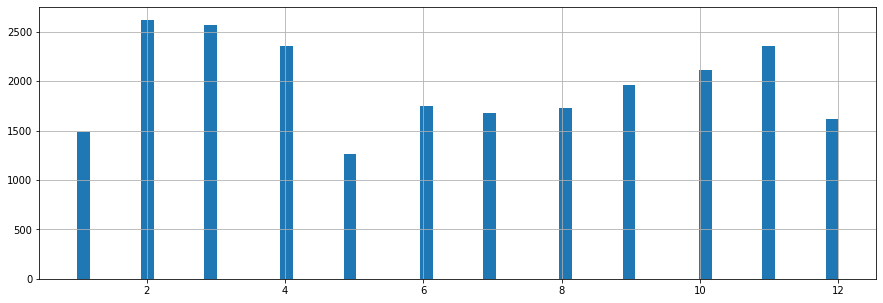

In [54]:
data['weekday'].hist(bins=60, figsize=(15,5)) # Сначала гистограмма дней недели
print(f"Среднее значение: {data['weekday'].mean()}")
print(f"Медианное значение: {data['weekday'].median()}")
plt.show()
data['month'].hist(bins=60, figsize=(15,5)) # Потом гистограмма месяцев
print(f"Среднее значение: {data['month'].mean()}")
print(f"Медианное значение: {data['month'].median()}")

Видим что в выходные объявления публиковали реже.  
Месяцы лидеры по количеству объявлений: Февраль, Март, Апрель и Ноябрь. В в декабре, январе и мае меньше всего объявлений.  
#### Изучим, как быстро продавались квартиры
Построим общую гистограмму количества дней в продаже, отдельно гистограмму для первых 50 дней, что бы понять какие продажы считать быстрыми и отдельно для 400 дней и больше, что бы понять какие продажи считать долгими.

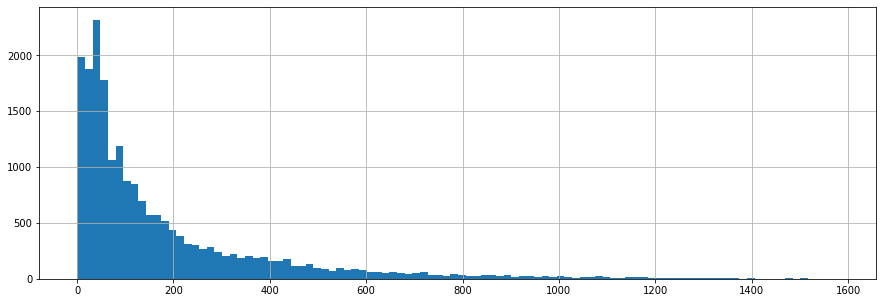

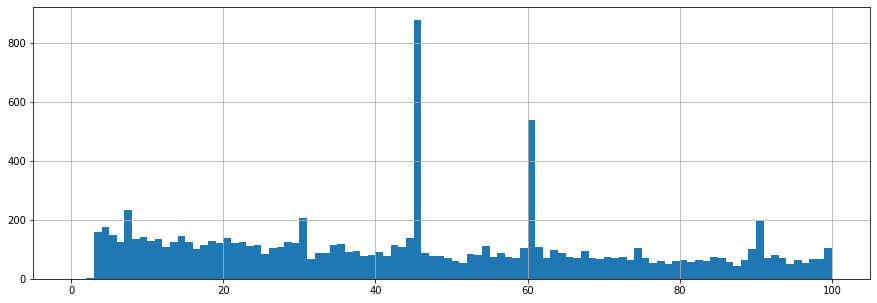

<AxesSubplot:>

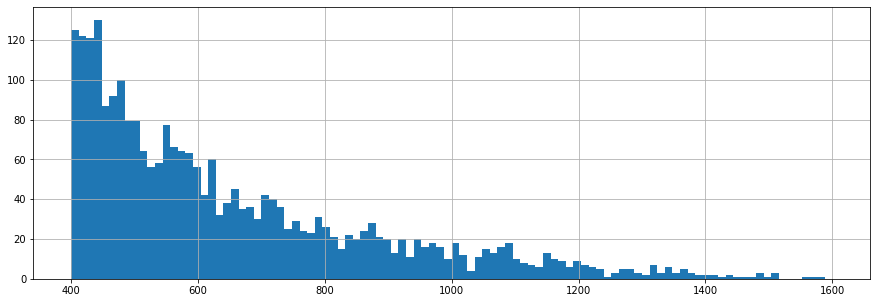

In [55]:
data['days_exposition'].hist(bins=100, figsize=(15,5))
plt.show()
data['days_exposition'].hist(bins=100, figsize=(15,5), range=(0,100))
plt.show()
data['days_exposition'].hist(bins=100, figsize=(15,5), range=(400,1600))

Посчитаем среднее и медиану количества дней в продаже.

In [56]:
print('Среднее:', data['days_exposition'].mean())
print('Медиана:', data['days_exposition'].median())

Среднее: 179.93954127989784
Медиана: 95.0


Из-за того, что есть квартиры, которые продавались очень долго, целесообразнее брать медианное значение для оценки обычного времени продажи квартиры. Медиана - 95 дней, то есть обычное время продажи квартиры - 95 дней.  
Выделяющихся быстрых продаж нет, гистограмма равномерная для первых 100 дней и потом идёт на спад (пики на гистограмме на 45 и 60 днях связаны с алгоритмами яндекс недвижимости, которые снимают объявление с публикации в некоторых случаях через 45 дней, а в некоторых через 60). А вот квартир, которые продавались больше чем 500 дней уже довольно мало, их можно считать долгими.

#### Изучим какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучим зависимость цены от общей площади.

Коэффициент корреляции: 0.7778752359228291


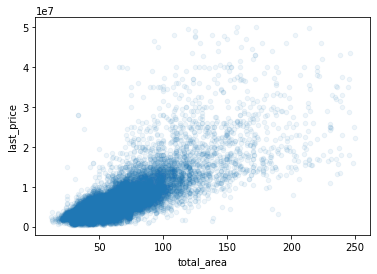

In [57]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.07)
print('Коэффициент корреляции:', data['total_area'].corr(data['last_price']))

Как видим на гистограмме - цена сильно зависит от площади, и коэффициент корреляции - 0.7 довольно близок к единице.  
Изучим зависимость цены от жилой площади.

Коэффициент корреляции: 0.6737267075317355


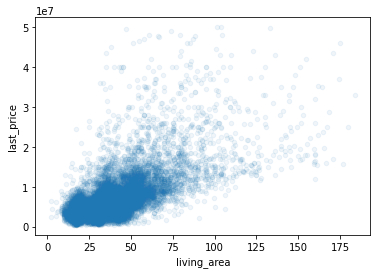

In [58]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.07)
print('Коэффициент корреляции:', data['living_area'].corr(data['last_price']))

Здесь зависимость чуть слабее чем от общей площади, скорее всего это связано с разной площадью нежилых помещений.  
Изучим зависимость цены от площади кухни.

Коэффициент корреляции: 0.5970946511679068


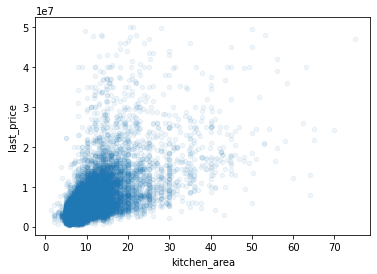

In [59]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.07)
print('Коэффициент корреляции:', data['kitchen_area'].corr(data['last_price']))

Здесь зависимость так же сохраняется, но она ещё слабее, чем от жилой площади. Скорее всего это потому что кухни по площади меньше, чем жилые помещения.  
Изучим зависимость цены от количества комнат.

Коэффициент корреляции: 0.49156131570870304


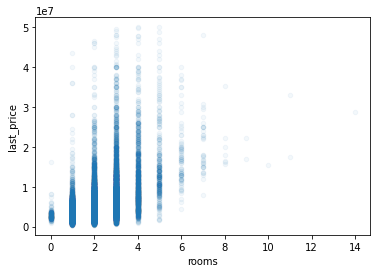

In [60]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.05)
print('Коэффициент корреляции:', data['rooms'].corr(data['last_price']))

Связь тоже прямая, причём для большего количества комнат она менее явная.  
Посмотрим на связь цены и этажа, на котором расположена квартира (первый, последний, другой).

Медианная цена на этаже первый : 3900000.0
Средняя цена на этаже первый : 4578301.030323914

Медианная цена на этаже последний : 4300000.0
Средняя цена на этаже последний : 5756691.80695334

Медианная цена на этаже другой : 4800000.0
Средняя цена на этаже другой : 6184633.623628595



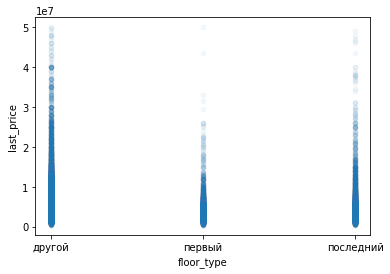

In [61]:
data.plot(x='floor_type', y='last_price', kind='scatter', alpha=0.05)
# Посчитаем медианное и среднее значение для каждой группы
for index in ['первый', 'последний', 'другой']:
    print('Медианная цена на этаже', index, ':', data.query('floor_type == @index')['last_price'].median())
    print('Средняя цена на этаже', index, ':', data.query('floor_type == @index')['last_price'].mean())  
    print()

Квартиры на первом и последнем этажах в среднем дешевле. Причём на первом сильнее дешевле.  
Изучим зависимость цены от дня недели размещения.

Медианная цена дня недели 0 : 4600000.0
Средняя цена дня недели 0 : 5974586.729352678

Медианная цена дня недели 1 : 4700000.0
Средняя цена дня недели 1 : 5959411.064454065

Медианная цена дня недели 2 : 4685000.0
Средняя цена дня недели 2 : 6006985.88857868

Медианная цена дня недели 3 : 4600000.0
Средняя цена дня недели 3 : 6089153.908213697

Медианная цена дня недели 4 : 4550000.0
Средняя цена дня недели 4 : 5778044.308371155

Медианная цена дня недели 5 : 4500000.0
Средняя цена дня недели 5 : 5683876.552246604

Медианная цена дня недели 6 : 4500000.0
Средняя цена дня недели 6 : 5770589.022511848



<AxesSubplot:xlabel='weekday'>

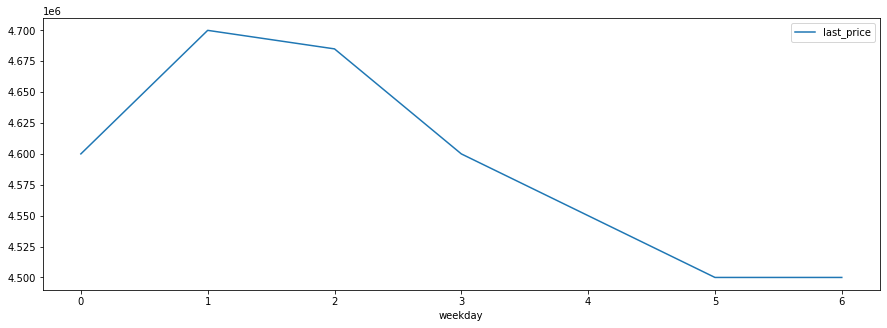

In [62]:
for index in sorted(data['weekday'].unique()):
    print('Медианная цена дня недели', index, ':', data.query('weekday == @index')['last_price'].median())
    print('Средняя цена дня недели', index, ':', data.query('weekday == @index')['last_price'].mean())  
    print()
    
data.pivot_table(index='weekday', values='last_price', aggfunc='median').plot(figsize=(15,5))

Для каждого дня недели цены в среднем почти одинаковые.  
Изучим зависимость цены от месяца размещения.

Медианная цена месяца 1 : 4600000.0
Средняя цена месяца 1 : 6034347.601346801

Медианная цена месяца 2 : 4637000.0
Средняя цена месяца 2 : 5950718.085114504

Медианная цена месяца 3 : 4650000.0
Средняя цена месяца 3 : 5821948.181534866

Медианная цена месяца 4 : 4780000.0
Средняя цена месяца 4 : 5913298.11911827

Медианная цена месяца 5 : 4500000.0
Средняя цена месяца 5 : 5908731.736342043

Медианная цена месяца 6 : 4400000.0
Средняя цена месяца 6 : 5777544.178694158

Медианная цена месяца 7 : 4600000.0
Средняя цена месяца 7 : 5905457.046539379

Медианная цена месяца 8 : 4550000.0
Средняя цена месяца 8 : 5945361.976918638

Медианная цена месяца 9 : 4650000.0
Средняя цена месяца 9 : 5967070.649158592

Медианная цена месяца 10 : 4550000.0
Средняя цена месяца 10 : 5792181.274621212

Медианная цена месяца 11 : 4685000.0
Средняя цена месяца 11 : 6119579.707979626

Медианная цена месяца 12 : 4650000.0
Средняя цена месяца 12 : 5995180.432449105



<AxesSubplot:xlabel='month'>

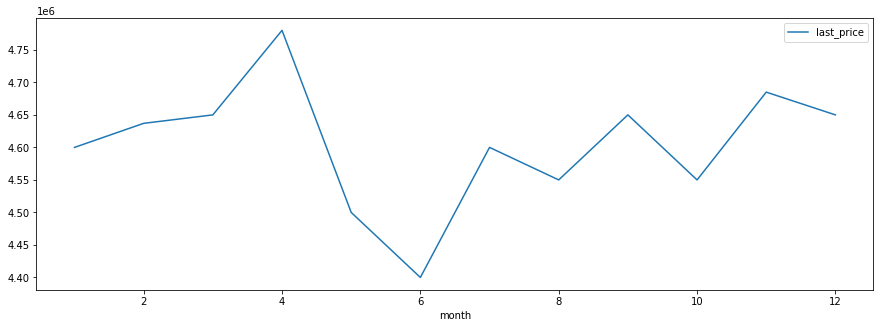

In [63]:
for index in sorted(data['month'].unique()):
    print('Медианная цена месяца', index, ':', data.query('month == @index')['last_price'].median())
    print('Средняя цена месяца', index, ':', data.query('month == @index')['last_price'].mean())  
    print()
    
data.pivot_table(index='month', values='last_price', aggfunc='median').plot(figsize=(15,5))

Для каждого месяца размещения цены тоже в среднем почти одинаковые.  
Изучим как цена зависит от года размещения.

Медианная цена года 2014 : 7500000.0
Средняя цена года 2014 : 10552334.195488721

Медианная цена года 2015 : 5250000.0
Средняя цена года 2015 : 6985597.81255374

Медианная цена года 2016 : 4500000.0
Средняя цена года 2016 : 6020675.470972423

Медианная цена года 2017 : 4500000.0
Средняя цена года 2017 : 5847816.415896488

Медианная цена года 2018 : 4550000.0
Средняя цена года 2018 : 5657588.757990329

Медианная цена года 2019 : 5000000.0
Средняя цена года 2019 : 6211528.048720645



<AxesSubplot:xlabel='year'>

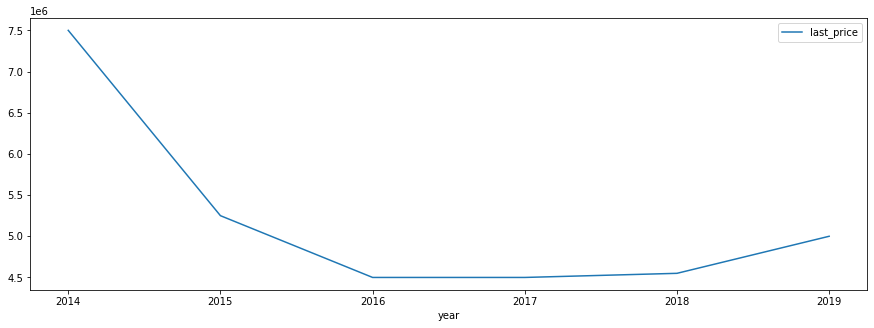

In [64]:
for index in sorted(data['year'].unique()):
    print('Медианная цена года', index, ':', data.query('year == @index')['last_price'].median())
    print('Средняя цена года', index, ':', data.query('year == @index')['last_price'].mean())  
    print()
data.pivot_table(index='year', values='last_price', aggfunc='median').plot(figsize=(15,5))

Посмотрим так же как цена квадратного метра зависит от года размещения.

Медианная цена года 2014 : 106468.81772212857
Средняя цена года 2014 : 119845.91442794417

Медианная цена года 2015 : 92857.14285714286
Средняя цена года 2015 : 98878.15729652144

Медианная цена года 2016 : 91463.41463414633
Средняя цена года 2016 : 95762.98607287684

Медианная цена года 2017 : 92337.91748526522
Средняя цена года 2017 : 95564.1246520625

Медианная цена года 2018 : 95588.23529411765
Средняя цена года 2018 : 96927.97794961993

Медианная цена года 2019 : 103125.0
Средняя цена года 2019 : 105178.54481757485



<AxesSubplot:xlabel='year'>

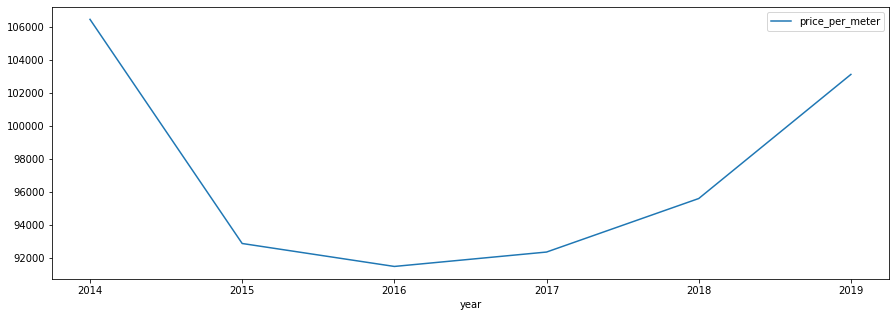

In [65]:
for index in sorted(data['year'].unique()):
    print('Медианная цена года', index, ':', data.query('year == @index')['price_per_meter'].median())
    print('Средняя цена года', index, ':', data.query('year == @index')['price_per_meter'].mean())  
    print()
data.pivot_table(index='year', values='price_per_meter', aggfunc='median').plot(figsize=(15,5))

В 2014-м годы в среднем квартиры и квадратный метр были дороже, в 2015 дешевле, в 2016 и 2017 ещё дешевле.  
В 2018 и 2019 цены росли, причём цены на квадратный метр росли значительно сильнее, чем общие цены на квартиры. Это говорит о том, что в 2018 и 2019 годах росли цены за квадратный метр, но уменьшалась средняя площадь продаваемых квартир.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [66]:
#В top10_list запишем список 10 населённых пунктов c наибольшим кол-вом объявлений
top10_list = data.groupby("locality_name")["last_price"].count().sort_values(ascending=False).head(10).index
#В top10_data запишем данные о населённых пунктах из top10_list
top10_data = data.query('locality_name.isin(@top10_list)').reset_index(drop=True)
#Настроим наглядное отображение больших чисел
pd.options.display.float_format = '{:,.1f}'.format
#Сгруппируем таблицу по населённым пунктам
#и посчитаем для каждого сумму всех цен и сумму всех площадей
top10_grouped = top10_data.pivot_table(index='locality_name', values=['last_price', 'total_area'], aggfunc='sum')
#Добавим столбец price_per_meter, в котором и посчитаем среднюю цену квдратного метра
top10_grouped['price_per_meter'] = top10_grouped['last_price'] / top10_grouped['total_area']
#Выведем отсортированную таблицу на экран
top10_grouped.sort_values(by='price_per_meter', ascending=False)

,last_price,total_area,price_per_meter
locality_name,,,
Санкт-Петербург,"111,119,816,408.0","964,997.9","115,150.3"
Пушкин,"2,310,074,264.0","21,959.0","105,199.5"
Кудрово,"2,057,300,760.0","21,898.6","93,946.6"
Парголово,"1,467,600,459.0","16,847.5","87,110.9"
Мурино,"2,170,292,700.0","26,018.4","83,413.9"
Шушары,"1,807,555,999.0","23,681.4","76,328.2"
Колпино,"1,302,939,246.0","17,644.7","73,842.9"
Гатчина,"1,070,919,360.0","15,639.5","68,475.4"
Всеволожск,"1,508,048,965.0","22,296.8","67,635.1"


В нашей десятке самая высокая цена за квадратный метр в Санкт-Петербурге, а самая низкая в Выборге.

#### Посчитаем среднюю цену каждого километра до центра города в Санкт-Петербурге
Построим таблицу, в которой опишем среднюю цену за квадратный метр для каждой удалдённости от центра

In [67]:
(data.query('locality_name == "Санкт-Петербург"')
                    .pivot_table(index='cityCenters_nearest_km', values='price_per_meter', aggfunc=['count','mean'])
)

,count,mean
,price_per_meter,price_per_meter
cityCenters_nearest_km,,
0.0,22,"192,050.5"
1.0,175,"146,720.2"
2.0,289,"136,886.5"
3.0,343,"118,739.0"
4.0,674,"127,665.6"
5.0,881,"134,890.8"
6.0,584,"140,639.8"
7.0,393,"141,291.5"


Построим график, показывающий зависимость средней цены квадратного метра от расстояния до центра

<AxesSubplot:xlabel='cityCenters_nearest_km'>

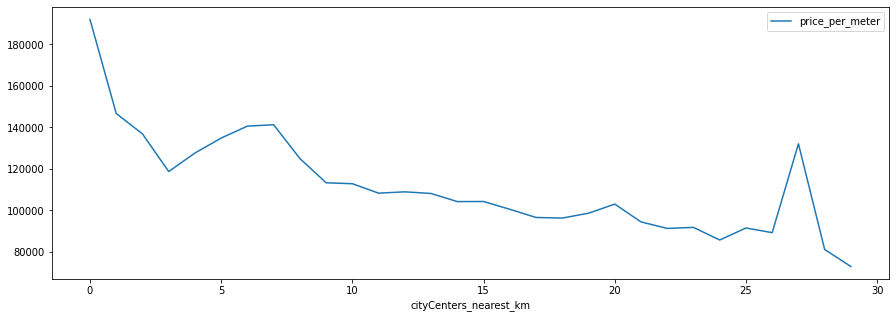

In [68]:
(data.query('locality_name == "Санкт-Петербург"')
                    .pivot_table(index='cityCenters_nearest_km', values='price_per_meter', aggfunc=['count','mean'])
                     .plot(y='mean', figsize=(15,5))
)

Видим что в среднем чем ближе квартира к центру, тем выше цена квадратного метра.

### Общий вывод

- Мы изучили данные, провели предобработку данных: нашли и заполнили пропущенные значения, там где это возможно, заменили тип данных там где это необходимо, устранили неявные дубликаты, устранили редкие и выбивающиеся значения.  
- Провели исследовательский анализ данных, в ходе которого изучили распределения отдельных параметров квартир.
- Выяснили что в среднем квартиры продаются за 95 дней. 
- Увидели как цена квартиры растёт с ростом её общей площади, жилой площади, площади кухни и с ростом количества комнат.
- Выяснили что на первом и последнем этажах квартиры в среднем дешевле. 
- Выяснили что цена квартиры не зависит от дня недели и месяца в которые она появилась в продаже. Но меняется из года в год.
- Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и увидели что в этой десятке самый дорогой метр в Санкт-Петербурге, а самый доступный в Выборге
- Посчитали среднюю цену каждого километра до центра города в Санкт-Петербурге, увидели что с чем ближе центру, тем цена квадратного метра выше.